# Cars4U Project: Linear Regression
### By: Swaraj Tripathy

The goal of this analysis is to generate insights and recommendations for the pricing of used cars for Cars4U. I will also be creating a linear model to predict the price of used cars.

We will look to answer the following questions: Can we accurately predict the market price of used cars in the Indian car market? What factors determine a used car's price, and how do those factors influence the price? What recommendations are there for pricing used cars that can be profitable for Cars4U?

## Exploratory Data Analysis

In [1]:
# import relevant libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [2]:
# load in the dataset
data = pd.read_csv("used_cars_data.csv")

# create copy of the data to be manipulated
df = data.copy()

In [3]:
# view the first 10 rows of data
df.head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,10.25,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.47,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21.00,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,7.63,1.95


In [4]:
# statistical summary of numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.00,3626.00,5439.00,7252.0
Year,7253.0,2013.365366,3.254421,1996.00,2011.00,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.00,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.00,5.00,5.00,10.0
New_Price,7253.0,21.307322,24.256314,3.91,7.88,11.30,21.69,375.0
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.0


In [5]:
# shape of the dataset, rows by columns
df.shape

(7253, 14)

In [6]:
# datatypes and null counts for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


In [7]:
# number of null values in each column
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

In [8]:
# number of duplicate rows
df.duplicated().sum()

0

In [9]:
# checks number of unique values in each column
df.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 385
Seats                   9
New_Price             643
Price                1373
dtype: int64

## Data Pre-Processing

In [10]:
# we first want to drop rows without the price column because that is the object of this analysis
# if there is no price, we can not get any insights
df = df[-df["Price"].isna()]

In [11]:
# drop serial number column
df.drop(["S.No."], axis = 1, inplace = True)

In [12]:
# adding column for just brand name from Name
brand = df["Name"].str.split(" ", n = 1, expand = True) 
brand.head()

df["Brand"] = brand[0]
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74,Audi


In [13]:
# check if the brands were created correctly
df["Brand"].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [14]:
# correct the brands that need fixing
df["Brand"].replace("Land", "Land Rover", inplace = True)
df["Brand"].replace("ISUZU", "Isuzu", inplace = True)

In [15]:
# drop name column now that we have brand
df.drop(["Name"], axis = 1, inplace = True)

In [16]:
# check the units on mileage, engine, and power columns
mileage_units = df["Mileage"].str.split(" ", n = 1, expand = True)
print(mileage_units[1].unique())

engine_units = df["Engine"].str.split(" ", n = 1, expand = True)
print(engine_units[1].unique())

power_units = df["Power"].str.split(" ", n = 1, expand = True)
print(power_units[1].unique())

['km/kg' 'kmpl' nan]
['CC' nan]
['bhp' nan]


In [17]:
def mileage_to_kmpl(mileage):
    """
    This function takes in a string representing a mileage in km/kg
    or kmpl and converts it to kmpl. If the input is already numeric, 
    which probably means it's NaN, this function just returns np.nan.
    """
    
    if isinstance(mileage, str):  # checks if `mileage` is a string
        if mileage.endswith('km/kg'):
            mileage = mileage[:-6]
            return float(mileage) * 1.40
        elif mileage.endswith('kmpl'):
            return float(mileage[:-5])
    else:  # this happens when the current mileage is np.nan
        return np.nan

In [18]:
# replaces the mileage column with all kmpl units
df["Mileage"] = df["Mileage"].apply(mileage_to_kmpl)

In [19]:
# drops the CC from engine displacement volume
df["Engine"] = engine_units[0]

In [20]:
# drops the bhp from engine displacement volume
df["Power"] = power_units[0]

In [21]:
# converts new_price in INR Lakhs to just INR
df["New_Price"] = df["New_Price"] * 100000

In [22]:
# converts price in INR Lakhs to just INR
df["Price"] = df["Price"] * 100000

In [23]:
# change engine data type to numeric
df["Engine"] = pd.to_numeric(df["Engine"])

In [24]:
# change engine data type to numeric
df["Power"] = pd.to_numeric(df["Power"])

In [25]:
# check missing values now
df.isnull().sum()

Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
New_Price              0
Price                  0
Brand                  0
dtype: int64

In [26]:
# impute the central tendency values for missing rows
# impute mean mileage into missing rows
df["Mileage"].fillna(df["Mileage"].mean(), inplace = True)

# impute mean engine displacement into missing rows
df["Engine"].fillna(df["Engine"].mean(), inplace = True)

# impute mean engine power into missing rows
df["Power"].fillna(df["Power"].mean(), inplace = True)

In [27]:
# dropping the missing seats rows (could impute but a little complicated)
df.drop(df[df["Seats"].isna()].index, axis = 0, inplace = True)

In [28]:
# check missing values now
df.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
Brand                0
dtype: int64

In [29]:
# make sure the processing was done the way we want
df.head(20)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,551000.0,175000.0,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,1606000.0,1250000.0,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,861000.0,450000.0,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,1127000.0,600000.0,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,5314000.0,1774000.0,Audi
5,Hyderabad,2012,75000,LPG,Manual,First,29.54,814.0,55.20,5.0,1025000.0,235000.0,Hyundai
6,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,947000.0,350000.0,Nissan
7,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,2100000.0,1750000.0,Toyota
8,Pune,2013,64430,Diesel,Manual,First,20.54,1598.0,103.60,5.0,1323000.0,520000.0,Volkswagen
9,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248.0,74.00,5.0,763000.0,195000.0,Tata


## Data Visualization
### Univariate Analysis

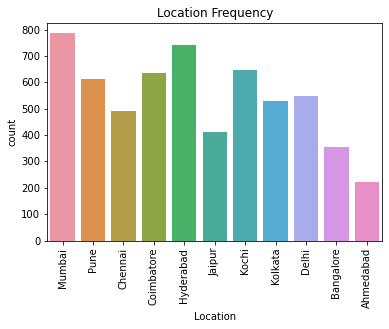

In [30]:
plt.title("Location Frequency")
plt.xticks(rotation = 90)
sns.countplot(data = df, x = "Location");

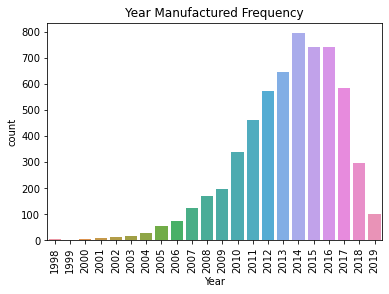

In [31]:
plt.title("Year Manufactured Frequency")
plt.xticks(rotation = 90)
sns.countplot(data = df, x = "Year");

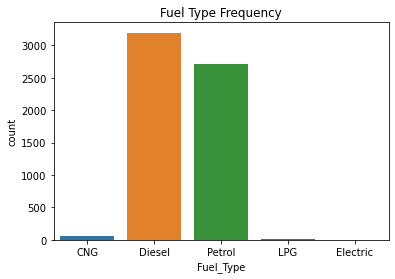

In [32]:
plt.title("Fuel Type Frequency")
sns.countplot(data = df, x = "Fuel_Type");

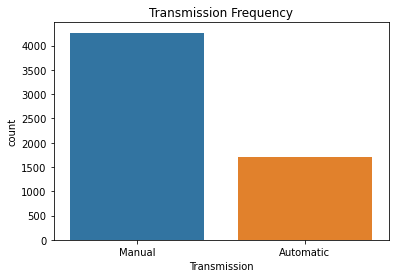

In [33]:
plt.title("Transmission Frequency")
sns.countplot(data = df, x = "Transmission");

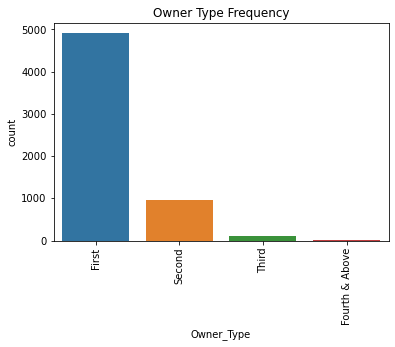

In [34]:
plt.title("Owner Type Frequency")
plt.xticks(rotation = 90)
sns.countplot(data = df, x = "Owner_Type", order = ["First", "Second", "Third", "Fourth & Above"]);

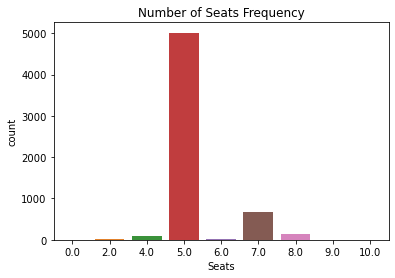

In [35]:
plt.title("Number of Seats Frequency")
sns.countplot(data = df, x = "Seats");

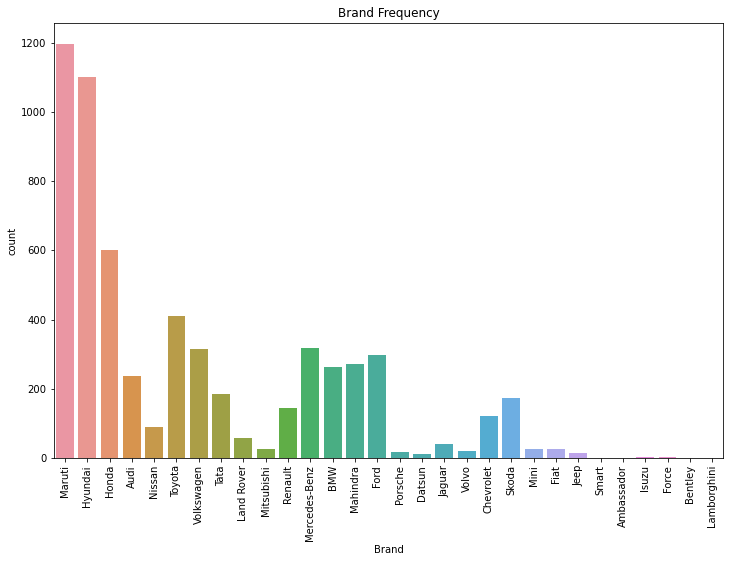

In [36]:
plt.figure(figsize = (12,8))
plt.title("Brand Frequency")
plt.xticks(rotation = 90)
sns.countplot(data = df, x = "Brand");

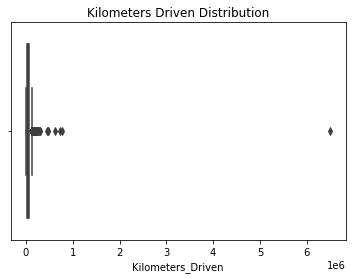

In [37]:
plt.title("Kilometers Driven Distribution")
sns.boxplot(data = df, x = "Kilometers_Driven", showfliers = True);

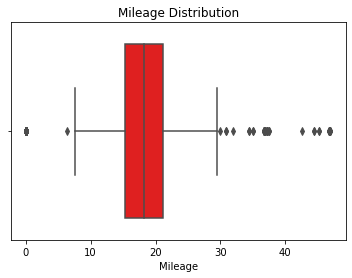

In [38]:
plt.title("Mileage Distribution")
sns.boxplot(data = df, x = "Mileage", showfliers = True, color = "Red");

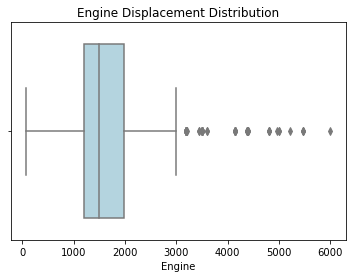

In [39]:
plt.title("Engine Displacement Distribution")
sns.boxplot(data = df, x = "Engine", showfliers = True, color = "lightblue");

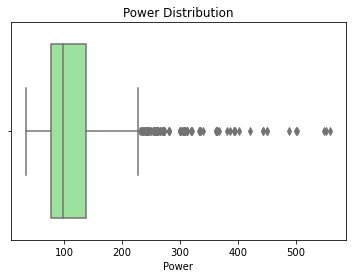

In [40]:
plt.title("Power Distribution")
sns.boxplot(data = df, x = "Power", showfliers = True, color = "lightgreen");

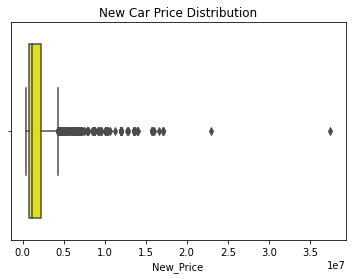

In [41]:
plt.title("New Car Price Distribution")
sns.boxplot(data = df, x = "New_Price", showfliers = True, color = "yellow");

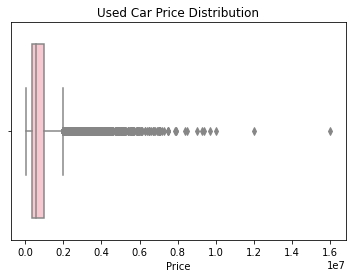

In [42]:
plt.title("Used Car Price Distribution")
sns.boxplot(data = df, x = "Price", showfliers = True, color = "pink");

Insights:
- The cars are from many different locations, but most from Mumbai
- Most cars were manufactured recently from 2010 onwards
- Most cars were either diesel or petrol, very few were electric, PNG, or LPG
- More than twice as many cars were manual than automatic
- Most cars only had one owner
- The vast majority of cars had 5 seats
- The top 3 most popular brands were Marati, Hyundai, and Honda
- 50% of cars were driven between 30,000 and 75,000 kilometers, but the distribution is right skewed, with some outliers
- Almost all cars get between 10 and 30 KMPL mileage
- The prices are both right skewed

Note:
- Many outliers were left untreated intentionally as there is a wide variety of cars in this data, and the values of those outliers are reasonable.

### Bivariate Analysis

We want to see the relationship the other variables have with price

In [43]:
# correlation of numeric variables
df.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
Year,1.000000,-0.172639,0.296360,-0.052886,0.013957,0.012333,-0.006094,0.305772
Kilometers_Driven,-0.172639,1.000000,-0.061502,0.090814,0.033455,0.083113,0.016498,-0.011276
Mileage,0.296360,-0.061502,1.000000,-0.582155,-0.504621,-0.297470,-0.408532,-0.306632
Engine,-0.052886,0.090814,-0.582155,1.000000,0.859557,0.393337,0.702375,0.658616
Power,0.013957,0.033455,-0.504621,0.859557,1.000000,0.100201,0.796306,0.768871
Seats,0.012333,0.083113,-0.297470,0.393337,0.100201,1.000000,0.039056,0.052225
New_Price,-0.006094,0.016498,-0.408532,0.702375,0.796306,0.039056,1.000000,0.763997
Price,0.305772,-0.011276,-0.306632,0.658616,0.768871,0.052225,0.763997,1.000000


- Looking at the correlations with price, we see that larger displacement engines, and more powerful cars are more expensive with a strong positive correlation. 
- Cars that are more expensive when new, also tend to be more expensive when used. 
- Newer cars are more expensive when used, but the relationship is not as strong. 
- Cars that have higher mileage tend to be cheaper when used, causing a negative correlation.
- The engine size and power relationships also hold for new car prices

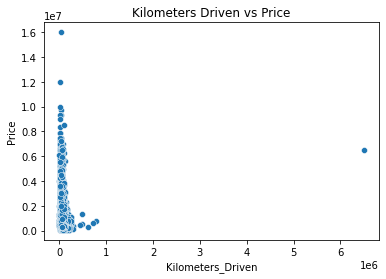

In [44]:
plt.title("Kilometers Driven vs Price")
sns.scatterplot(data = df, x = "Kilometers_Driven", y = "Price");

It is very unlikely that a car actually drove 6 million kilometers, so we will remove that data point as an outlier. We will also just remove outliers of greater than 400000 km driven, because it is unlikely any car would be driven more than that.

In [45]:
# drops the unreasonable outliers
df[df["Kilometers_Driven"] > 400000]
df.drop([340, 358, 1860, 2328, 2823, 3092, 4491] , axis = 0, inplace = True)

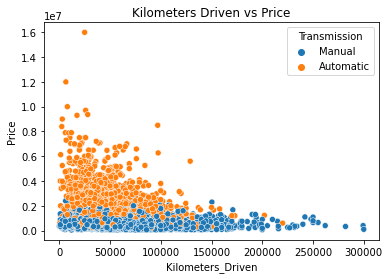

In [46]:
plt.title("Kilometers Driven vs Price")
sns.scatterplot(data = df, x = "Kilometers_Driven", y = "Price", hue = "Transmission");

- We can pretty clearly see that automatic cars tend to be more expensive than manual cars.
- However, there seems to be more variance in price for automatic cars.
- There seems to be more variance in kilometers driven for manual cars.
- The price seems pretty constant for manual cars regardless of kilometers driven.
- There is a negative relationship with price and kilometers driven for automatic cars.

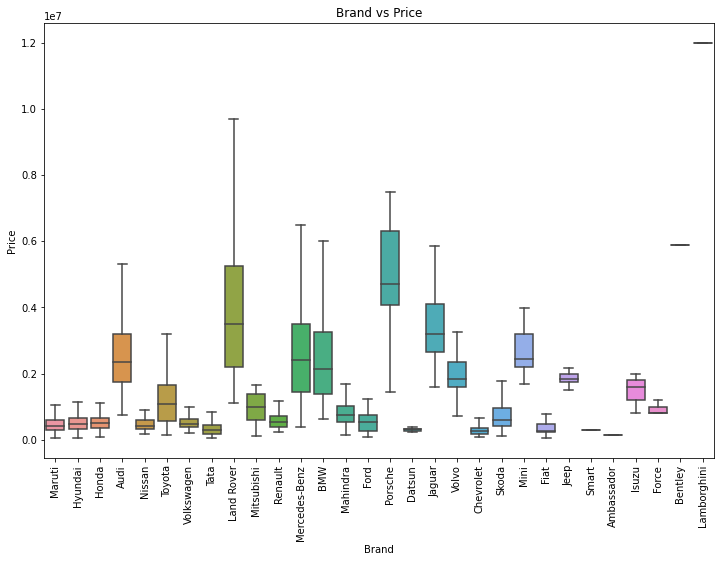

In [47]:
plt.figure(figsize = (12,8))
plt.title("Brand vs Price")
plt.xticks(rotation = 90)
sns.boxplot(data = df, x = "Brand", y = "Price", showfliers = False);

- Interestingly, Maruti, Hyundai, and Honda are the most popular brands despite being some of the lowest priced cars on the market.
- Porsche, Bentley, and Lamborghini are the most expensive brands, but are some of the least popular, which is understandable as not many people could afford them.

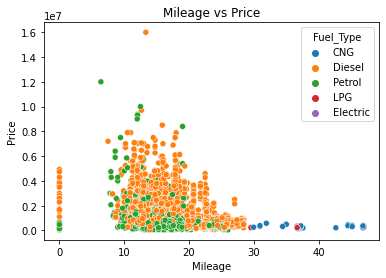

In [48]:
plt.title("Mileage vs Price")
sns.scatterplot(data = df, x = "Mileage", y = "Price", hue = "Fuel_Type");

- There seems to be little relationship between price and mileage for diesel and petrol vehicles.
- CNG cars are low cost with very high mileage
- There seems to be an overall negative relationship between milage and price

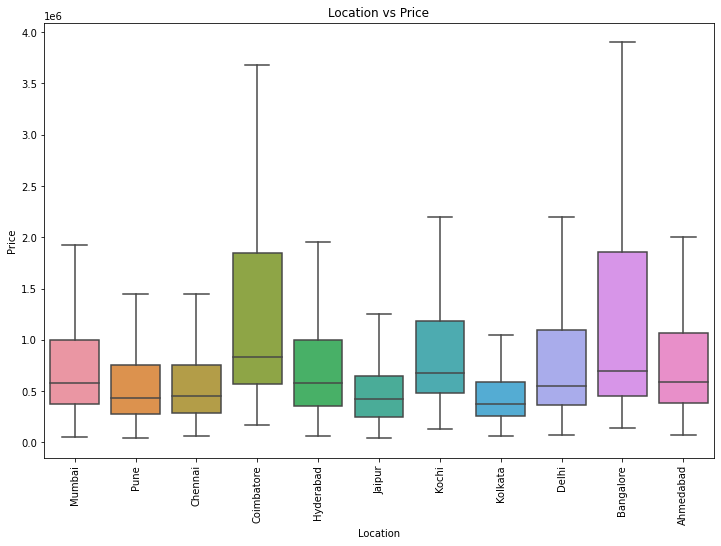

In [49]:
plt.figure(figsize = (12,8))
plt.title("Location vs Price")
plt.xticks(rotation = 90)
sns.boxplot(data = df, x = "Location", y = "Price", showfliers = False);

- On average Coimbatore had the priciest used cars
- Bangalore had the most variance in prices.
- Most other locations had similar median prices.

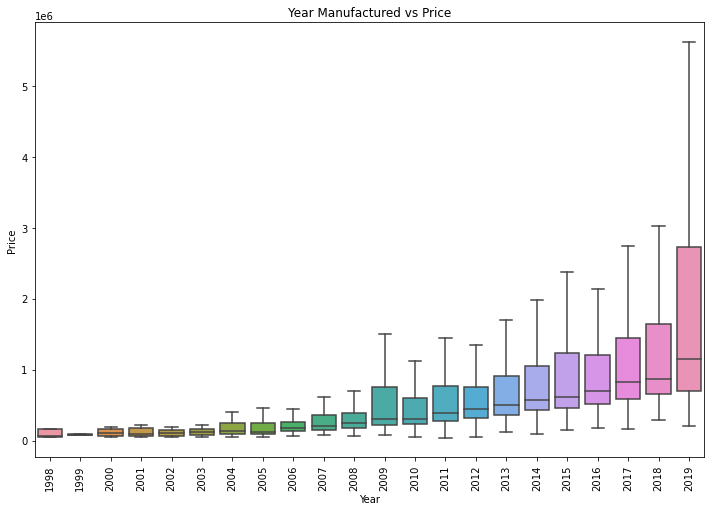

In [50]:
plt.figure(figsize = (12,8))
plt.title("Year Manufactured vs Price")
plt.xticks(rotation = 90)
sns.boxplot(data = df, x = "Year", y = "Price", showfliers = False);

- The median price increases as cars get newer.
- Newer cars also have much more variance in price.

## Linear Regression Model

In [51]:
# import linear regression packages
# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [52]:
# set our predictors and response variables
X = df.drop("Price", axis = 1)
y = df["Price"]

In [53]:
# generate dummy variables for the categorical variables
X = pd.get_dummies(
    X,
    columns = X.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)
X.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land Rover,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2010,72000,37.24,998.0,58.16,5.0,551000.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,1606000.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,861000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,1127000.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,5314000.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
# splitting the data in 80:20 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [55]:
# fitting the linear model
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

In [56]:
# values of the model coefficients
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index = x_train.columns.tolist() + ["Intercept"],
    columns = ["Coefficients"],
)
round(coef_df, 1)

,Coefficients
Year,91235.6
Kilometers_Driven,-3.2
Mileage,-14089.7
Engine,172.6
Power,6387.8
Seats,-14030.3
New_Price,0.1
Location_Bangalore,198522.9
Location_Chennai,122579.4
Location_Coimbatore,160107.3


Coefficient Interpretation:
- Positive coefficients such as Year, Engine, and Power were associated with an increase in price. So increasing one of those led to an increase in price in this dataset
- Negative coefficients such as Seats and Mileage were associated with a decrease in price. So increasing one of those led to an decrease in price in this dataset
- The dummy variable can be measured as their effect on price relative to the first reference level. For example, Transmission_Manual has a large positive coefficient, which means manual cars were associated with higher price when compared to automatic cars.
- Interestingly, Brand_Bentley has a large negative coefficient, despite being associated with high prices in our EDA.

## Model Performance Evaluation

In [57]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [58]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,517337.832703,281676.386062,0.7908,0.788407,56.204625


In [59]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,482858.113611,276485.810637,0.795077,0.785361,55.426225


- The R^2 values are 79.08% and 79.51% for train and test sets. This means the model performs well and can explain 79% of the variance in both datasets.
- The R^2 and RMSE values are similar for both test and training sets. This shows that the model is not overfitting.
- The MAE is very high, which means there is high mean error on our models predictions.
- Additionally, the MAPE is 56 and 55 in train and test sets respectively, so the model can predict within 55%-56% of the correct prices.
- The overall performance of the model is decent, because although there are high errors, the R^2 is high and the model is not overfitting.

# Conclusion

## Insights and Recommendations

- We were able to build a linear model that can predict the price of used cars with 79% accuracy.
- Lamborghinis, large and powerful engines, and newer models tend to increase the price.
- Electric cars, manuals, and cars with many owners also drive the price up.
- Petrol and diesel cars as well as cars with two owners drive the price down.
- Cars with better mileage and more seats are cheaper.
- Cars in Kolkuta, Dehli, and Mumbai are cheaper than other locations.
- Similarly, cars in Bangalore, Hyderabad, and Coimbatore are more expensive.

- Cars4U can used location based pricing as the market price in different locations would be different. We know from our model that used car prices in Mumbai are lower than prices in Bangalore, so they can set the prices higher in Bangalore and lower in Mumbai.
- Using the location based strategy, Cars4U could try to sell more small petrol and diesel cars in places like Mumbai and Dehli, where prices are lower, and try to sell more exotic cars like Lamborghinis and electric cars that are more costly in places like Bangalore.
- Automatic cars with small engines that are older would tend to sell better in Kolkuta than in Coimbatore. When selling these cars in places like Coimbatore, Cars4U would have an opportunity to drive up the price and make a profit.
- Since many car dealerships participate in resell programs, selling newer powerful cars in pricey locations, then buying those cars back after a few years when they are old and are relatively less powerful, then selling thse in cheaper locations could be an opportunity for profit.